## PCA

In [2]:
import math
import os
import sys
import numpy as np
import pandas as pd
SIGMA = 0.0035
SIGMA_SQR = SIGMA * SIGMA
class BFAnalyzer:
    def __init__(self):
        self.__frequency = [float(0)]*256
    def compute(self, text):
        for i in range(256):
            self.__frequency[i]=text.count(chr(i))
        return self
    def normalize(self):
        try:
            norm = max(self.__frequency)
            self.__frequency =  list(map(lambda x: x / norm, self.__frequency))
        except:
            pass
        return self
    def compand(self):
        B = 1.5
        self.__frequency =  list(map(lambda x: x ** ( 1 / B), self.__frequency))
        return self
    def frequency(self):
        return np.array(self.__frequency)
    def __str__(self):
        return ",".join(map(str, self.__frequency))
class BFFileprint:
    def __init__(self,signatures):
        self.__fileprint=[float(0)]*256
        self.__signatures=signatures
    def computeFileprint(self):
        tot=len(self.__signatures)
        for i in range(256):
            self.__fileprint[i]=(sum([x[i] for x in self.__signatures])/tot)
        return self
    def fileprint(self):
        return self.__fileprint
class ByteFrequencyCorrelator:
    def __init__(self,filePrint):
        self.filePrint = filePrint
    def correlate(self, signature):
        self.cmpSignature = signature
        self.correlation = [None] * 256
        for i in range(256):
            diff = self.cmpSignature[i] - self.baseSignature[i]
            exp = ( -1 * diff * diff ) / ( 2 * SIGMA_SQR )
            self.correlation[i] = math.exp(exp)
        return self.correlation
class BFCrossCorrelator:
    def __init__(self, baseSignature):
        self.baseSignature = baseSignature
    def correlate(self):
        self.correlation = Matrix = [[0 for x in range(256)] for x in range(256)]
        for i in range(256):
            for j in range(i):
                freqDiff = ( self.baseSignature[i] - self.baseSignature[j] )
                exp = ( -1 * freqDiff * freqDiff ) / ( 2 * SIGMA_SQR )
                self.correlation[i][j] = freqDiff
                self.correlation[j][i] = math.exp(exp)
        return self.correlation
worksample='/home/surya/blueOptima/worksample_data/'
data={}
for folder in os.listdir(worksample):
    temp=[]
    for file in os.listdir(worksample+folder):
        with open(worksample+folder+'/'+file) as textfile:
            try:
                text=textfile.read()
                analyzer=BFAnalyzer()
                signature=analyzer.compute(text).compand().normalize().frequency()
                temp.append(signature)
            except:
                pass
    data[folder]=temp
#signatures generated for every file and stored in data dictionary where keys are file type and values are signatures
#Compute FilePrint for each filetype from generated signatures
filePrints={}
for key,value in data.items():
    generator=BFFileprint(value)
    filePrints[key]=generator.computeFileprint().fileprint()
    

In [37]:
X=[]
Y=[]
numy=[]
i=1
for key,value in data.items():
    y=[key]*len(value)
    X+=value
    Y+=y
    numy+=[i]*len(value)
    i+=1
XT=pd.DataFrame(X,columns=[i for i in range(256)])

In [9]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

## principal component analysis

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
comps=pca.fit_transform(XT)
PCADF = pd.DataFrame(data =comps,columns = ['pc1', 'pc2','pc3'])

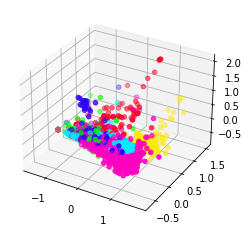

In [11]:
ax = plt.axes(projection='3d')
ax.scatter3D(PCADF['pc1'],PCADF['pc2'],PCADF['pc3'], c=numy, cmap='gist_rainbow');

## kernel pca

In [15]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=3)
kcomps=kpca.fit_transform(XT)

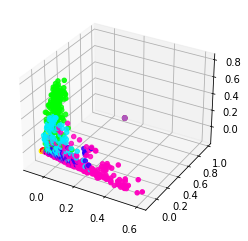

In [19]:
KPCADF = pd.DataFrame(data =kcomps,columns = ['pc1', 'pc2','pc3'])
ax = plt.axes(projection='3d')
ax.scatter3D(KPCADF['pc3'],KPCADF['pc2'],KPCADF['pc1'], c=numy, cmap='gist_rainbow');

# linear discriminant analysis

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=3)
comps=lda.fit(XT,numy).transform(XT)

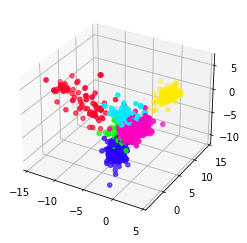

In [25]:
LDADF = pd.DataFrame(data =comps,columns = ['pc1', 'pc2','pc3'])
ax = plt.axes(projection='3d')
ax.scatter3D(LDADF['pc2'],LDADF['pc1'],LDADF['pc3'], c=numy, cmap='gist_rainbow');

## NMF non-negative matrix factorization

In [26]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=3,random_state=1)
comps=nmf.fit_transform(XT)

/home/surya/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


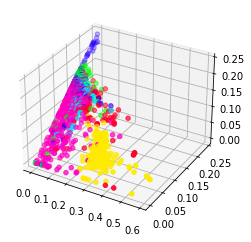

In [29]:
NMFDF = pd.DataFrame(data =comps,columns = ['pc1', 'pc2','pc3'])
ax = plt.axes(projection='3d')
ax.scatter3D(NMFDF['pc3'],NMFDF['pc2'],NMFDF['pc2'], c=numy, cmap='gist_rainbow');

## TSVD truncated singular value decomposition

In [30]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
tsvd=TruncatedSVD(n_components=3)
features_sparse=csr_matrix(XT)
comps=tsvd.fit(features_sparse).transform(features_sparse)

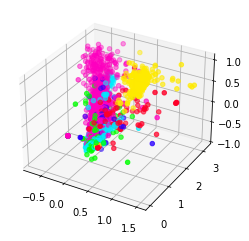

In [34]:
TSVDDF = pd.DataFrame(data =comps,columns = ['pc1', 'pc2','pc3'])
ax = plt.axes(projection='3d')
ax.scatter3D(TSVDDF['pc3'],TSVDDF['pc1'],TSVDDF['pc2'], c=numy, cmap='gist_rainbow');

In [43]:
PCADF['target']=numy
PCADF['class']=Y
KPCADF['target']=numy
KPCADF['class']=Y
LDADF['target']=numy
LDADF['class']=Y
NMFDF['target']=numy
NMFDF['class']=Y
TSVDDF['target']=numy
TSVDDF['class']=Y

In [45]:
PCADF.to_csv('PCADF.csv')
KPCADF.to_csv('KPCADF.csv')
LDADF.to_csv('LDADF.csv')
NMFDF.to_csv('NMFDF.csv')
TSVDDF.to_csv('TSVDDF.csv')